## About Dataset from [NYC Open Data](https://data.cityofnewyork.us/Health/Youth-Behavior-Risk-Survey-High-School-/3qty-g4aq).
Dataset: Youth_Behavior_Risk_Survey__High_School_.csv
- Survery
 - Title of survey
- Prevalence
- Year
 - Year of the Survey
- Smoked at least once past 30 days
 - Percentage of students smoked cigarettes at least once in the past 30 days
- Binge drinking Ɨ in past 30 days
 - Percentage of students who currently were binge drinking (had four or more drinks of alcohol in a row for female students or five or more drinks of alcohol in a row for male students) in past 30 days 
- Drank five or more alcoholic drinks in a row in past 30 days
 - Percentage of students who had five or more drinks of alcohol in past 30 days 
- Got help from a counselor in past 12 months
 - Percentage of students who got help from a professional counselor, social worker, or therapist for an emotional personal problem in the past 12 months

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

In [2]:
youth_behavior_data_original = pd.read_csv('Youth_Behavior_Risk_Survey__High_School_.csv')
youth_behavior_data = youth_behavior_data_original.copy()

In [3]:
youth_behavior_data.head()

,Survey,Prevalence,Year,Smoked at least once past 30 days,Binge drinking Ɨ in past 30 days,Drank five or more alcoholic drinks in a row in past 30 days,Got help from a counselor in past 12 months,Drinks 1 or more sodas per day in past 7 days,Adolescent obesity,Physically active 60 minutes per day
0,YBRS,Prevalence 2019,2019,3.3,8.9,NaN,NaN,12.4,13.8,14.5
1,YBRS,Lower 95% CI 2019,2019,2.7,7.8,NaN,NaN,11.2,12.7,13.0
2,YBRS,Upper 95% CI 2019,2019,4.0,10.1,NaN,NaN,13.7,15.1,16.2
3,YBRS,Prevalence 2017,2017,5.0,5.0,NaN,18.0,14.9,13.5,20.8
4,YBRS,Lower 95% CI 2017,2017,4.1,4.2,NaN,16.8,13.7,12.4,19.3


In [4]:
youth_behavior_data.columns

Index(['Survey', 'Prevalence', 'Year', 'Smoked at least once past 30 days',
       'Binge drinking Ɨ in past 30 days ',
       'Drank five or more alcoholic drinks in a row in past 30 days',
       'Got help from a counselor in past 12 months',
       'Drinks 1 or more sodas per day in past 7 days', 'Adolescent obesity',
       'Physically active 60 minutes per day'],
      dtype='object')

In [5]:
youth_behavior_data.rename(columns={'Smoked at least once past 30 days': 'Smoking',
                                    'Binge drinking Ɨ in past 30 days ': 'Bingeing',
                                    'Drank five or more alcoholic drinks in a row in past 30 days': 'Drinking(alcholic)',
                                    'Got help from a counselor in past 12 months': 'Meeting(Counselor)',
                                    'Drinks 1 or more sodas per day in past 7 days': 'Drinking(soda)',
                                    'Adolescent obesity': 'obesity',
                                    'Physically active 60 minutes per day': 'Activity'},
                           inplace=True)

In [6]:
youth_behavior_data.isnull().sum()

Survey                0
Prevalence            0
Year                  0
Smoking               0
Bingeing              9
Drinking(alcholic)    6
Meeting(Counselor)    6
Drinking(soda)        0
obesity               0
Activity              0
dtype: int64

In [7]:
def print_unique(df):
    print(df.name, ':', df.unique())

In [8]:
for i in range(len(youth_behavior_data.columns)):
    print_unique(youth_behavior_data[youth_behavior_data.columns[i]])

Survey : ['YBRS']
Prevalence : ['Prevalence 2019' 'Lower 95% CI 2019' 'Upper 95% CI 2019'
 'Prevalence 2017' 'Lower 95% CI 2017' 'Upper 95% CI 2017'
 'Prevalence 2015' 'Lower 95% CI 2015' 'Upper 95% CI 2015'
 'Prevalence 2013' 'Lower 95% CI 2013' 'Upper 95% CI 2013'
 'Prevalence 2011' 'Lower 95% CI 2011' 'Upper 95% CI 2011']
Year : [2019 2017 2015 2013 2011]
Smoking : [3.3 2.7 4.  5.  4.1 6.1 5.8 4.7 7.  8.2 6.9 9.7 8.5 7.5 9.6]
Bingeing : [ 8.9  7.8 10.1  5.   4.2  5.9  nan]
Drinking(alcholic) : [ nan  8.5  7.3  9.9 10.8  9.8 11.8 12.7 11.7 13.9]
Meeting(Counselor) : [ nan 18.  16.8 19.1 18.3 16.9 19.7 17.9 16.5 19.4]
Drinking(soda) : [12.4 11.2 13.7 14.9 16.3 15.8 14.1 17.7 15.7 14.6 16.9 20.9 19.  23.1]
obesity : [13.8 12.7 15.1 13.5 12.4 14.6 11.3 13.7 11.8 10.6 13.2 11.6 12.8]
Activity : [14.5 13.  16.2 20.8 19.3 22.4 20.9 19.4 22.5 18.7 17.1 20.5 20.3 19.1
 21.6]


In [9]:
youth_behavior_data['Bingeing'].fillna(youth_behavior_data['Bingeing'].mode()[0], inplace=True)
youth_behavior_data['Drinking(alcholic)'].fillna(youth_behavior_data['Drinking(alcholic)'].mode()[0], inplace=True)
youth_behavior_data['Meeting(Counselor)'].fillna(youth_behavior_data['Meeting(Counselor)'].mode()[0], inplace=True)

In [10]:
youth_behavior_data.isnull().sum()

Survey                0
Prevalence            0
Year                  0
Smoking               0
Bingeing              0
Drinking(alcholic)    0
Meeting(Counselor)    0
Drinking(soda)        0
obesity               0
Activity              0
dtype: int64

In [11]:
youth_behavior_data.head(4)

,Survey,Prevalence,Year,Smoking,Bingeing,Drinking(alcholic),Meeting(Counselor),Drinking(soda),obesity,Activity
0,YBRS,Prevalence 2019,2019,3.3,8.9,7.3,16.5,12.4,13.8,14.5
1,YBRS,Lower 95% CI 2019,2019,2.7,7.8,7.3,16.5,11.2,12.7,13.0
2,YBRS,Upper 95% CI 2019,2019,4.0,10.1,7.3,16.5,13.7,15.1,16.2
3,YBRS,Prevalence 2017,2017,5.0,5.0,7.3,18.0,14.9,13.5,20.8


In [12]:
youth_behavior_data.shape

(15, 10)

In [13]:
youth_behavior_Prevalence_data  = youth_behavior_data[0:15:3]
youth_behavior_Lower_data  = youth_behavior_data[1:15:3]
youth_behavior_Upper_data  = youth_behavior_data[2:15:3]

In [14]:
youth_behavior_Prevalence_data

,Survey,Prevalence,Year,Smoking,Bingeing,Drinking(alcholic),Meeting(Counselor),Drinking(soda),obesity,Activity
0,YBRS,Prevalence 2019,2019,3.3,8.9,7.3,16.5,12.4,13.8,14.5
3,YBRS,Prevalence 2017,2017,5.0,5.0,7.3,18.0,14.9,13.5,20.8
6,YBRS,Prevalence 2015,2015,5.8,4.2,8.5,18.3,15.8,12.4,20.9
9,YBRS,Prevalence 2013,2013,8.2,4.2,10.8,17.9,15.7,11.8,18.7
12,YBRS,Prevalence 2011,2011,8.5,4.2,12.7,16.5,20.9,11.6,20.3


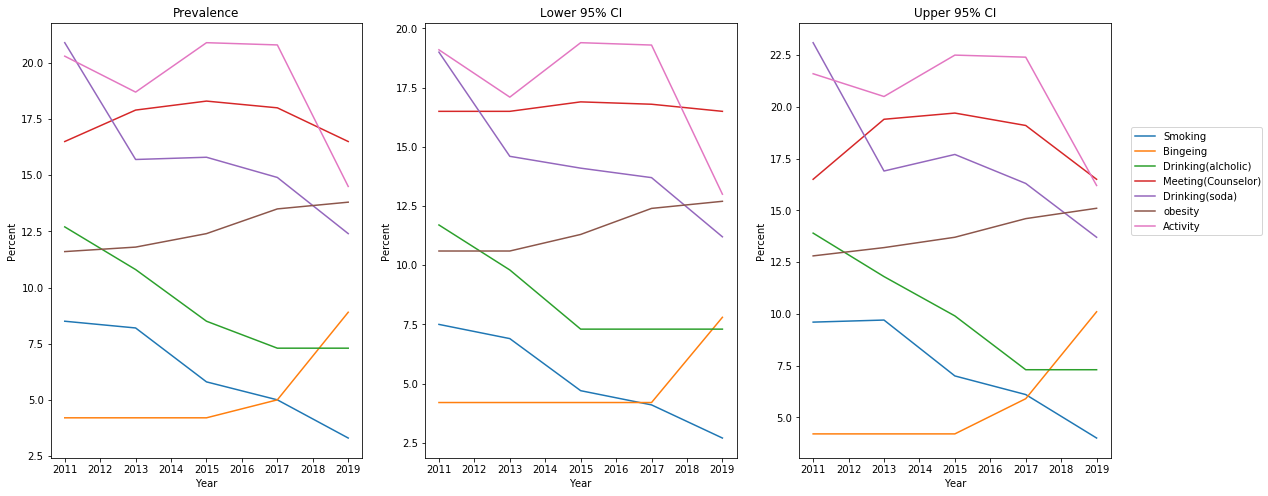

In [15]:
fig, axs = plt.subplots(1,3, figsize=(19, 8))

cols = ['Smoking', 'Bingeing', 'Drinking(alcholic)', 'Meeting(Counselor)','Drinking(soda)', 'obesity', 'Activity']
dataframe_list = [youth_behavior_Prevalence_data, youth_behavior_Lower_data, youth_behavior_Upper_data]
dataframe_list_name = ['Prevalence', 'Lower 95% CI', 'Upper 95% CI']

for i in range(len(cols)):
    sns.lineplot(data=dataframe_list[0], x= 'Year', y=cols[i], ax = axs[0]).set(title=dataframe_list_name[0])
axs[0].set_ylabel('Percent')
for i in range(len(cols)):
    sns.lineplot(data=dataframe_list[1], x= 'Year', y=cols[i], ax = axs[1]).set(title=dataframe_list_name[1])
axs[1].set_ylabel('Percent')
for i in range(len(cols)):
    sns.lineplot(data=dataframe_list[2], x= 'Year', y=cols[i],  label=str(cols[i]), ax = axs[2]).set(title=dataframe_list_name[2])
axs[2].set_ylabel('Percent')
plt.legend(bbox_to_anchor=(1.05, 0.5, 0.45, 0.1),loc='lower right', mode="expand")

## Dataset from [data.world](https://data.world/city-of-ny/3qty-g4aq).
Dataset: youth-behavior-risk-survey-1.csv

In [16]:
youth_behavior_survey_data_original = pd.read_csv('youth-behavior-risk-survey-1.csv')
youth_behavior_survey_data = youth_behavior_survey_data_original.copy()

In [17]:
youth_behavior_survey_data.head(2)

,Survey,Question,Year,Prevalence,Lower95%CI,Upper95%CI
0,YRBS,Adolescent obesity,2011,11.6,10.6,12.8
1,YRBS,Physically active 60 minutes per day,2011,20.3,19.1,21.6


In [18]:
youth_behavior_survey_data.isnull().sum()

Survey        0
Question      0
Year          0
Prevalence    2
Lower95%CI    2
Upper95%CI    2
dtype: int64

In [19]:
youth_behavior_survey_data['Prevalence'].fillna(youth_behavior_survey_data['Prevalence'].mode()[0], inplace=True)
youth_behavior_survey_data['Lower95%CI'].fillna(youth_behavior_survey_data['Lower95%CI'].mode()[0], inplace=True)
youth_behavior_survey_data['Upper95%CI'].fillna(youth_behavior_survey_data['Upper95%CI'].mode()[0], inplace=True)

In [20]:
youth_behavior_survey_data.isnull().sum()

Survey        0
Question      0
Year          0
Prevalence    0
Lower95%CI    0
Upper95%CI    0
dtype: int64

In [21]:
youth_behavior_survey_data_new = youth_behavior_survey_data.drop_duplicates(subset=youth_behavior_survey_data.columns, keep='first')

In [22]:
youth_behavior_survey_data_sorted_year = youth_behavior_survey_data_new.sort_values(by=['Question'])

In [23]:
youth_behavior_survey_data_sorted_year = youth_behavior_survey_data_sorted_year.reset_index(drop=True)

In [24]:
def subtract_year(df):
    diff = df['Prevalence'].values[0] - df['Prevalence'].values[1]
    if diff < 0:
        return 'Increasing'
    if diff > 0:
        return 'Decreasing'
    if diff == 0:
        return 'Stay same'

In [25]:
for i in range(len(youth_behavior_survey_data_sorted_year['Question'].unique())):
    start = i*2
    end = (i+1)*2
    Result  = 'Behavior Risk ('+youth_behavior_survey_data_sorted_year['Question'].unique()[i]+ ') is ' +subtract_year(youth_behavior_survey_data_sorted_year[start:end]) +' from 2011 to 2013'
    print(Result)

Behavior Risk (Adolescent obesity) is Increasing from 2011 to 2013
Behavior Risk (Drank five or more alcoholic drinks in a row in past 30 days) is Decreasing from 2011 to 2013
Behavior Risk (Drinks 1 or more sodas per day in past 7 days) is Decreasing from 2011 to 2013
Behavior Risk (Got help from a counselor in past 12 months) is Increasing from 2011 to 2013
Behavior Risk (Physically active 60 minutes per day) is Decreasing from 2011 to 2013
Behavior Risk (Smoked at least once past 30 days) is Decreasing from 2011 to 2013


## Conclusion
- 2011 - 2019
  - Positive Behavior
      - Physically active 60 minutes per day
        - Decreasing from 2011 - 2019
        - it's rapidly decreasing since 2017
      - Meeting with Counselor
        - Increasing from 2011 to 2015, but decreasing from 2015 to 2019
  - Negative Behavior
      - Increasing from 2011 -2019
        - Adolescent obesity
        - Binge drinking Ɨ in past 30 days
            - it's rapidly Increasing since 2017
      - Decreasing from 2011 - 2019
        - Smoked at least once past 30 days
        - Drank five or more alcoholic drinks in a row in past 30 days
        - Drinks 1 or more sodas per day in past 7 days